<a href="https://colab.research.google.com/github/giakomorssi/Machine_Learning/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change Colab runtime to GPU
import os
os.environ['COLAB_TPU_ADDR'] = ''
os.environ['COLAB_GPU_ALLOC'] = '1'
os.environ['COLAB_GPU'] = '1'
print("Runtime switched to GPU")

import tensorflow as tf

# This code sets the runtime to use the GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Runtime switched to GPU
Please install GPU version of TF


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/University/ML/customer_segmentation.csv')

# Meaning of the Columns


* **order_id**: unique order identifier 
* **customer_id**: the key to the orders dataset. Each order has a unique customer_id 
* **customer_unique_id**: the unique identifier of a customer.
* **customer_city**: customer city name
* **customer_state**: customer state
* **order_item_id**: sequential number identifying the number of items included in the same order.
* **product_id**: product unique identifier
* **price**: item price
* **freight_value**: item freight value item (if an order has more than one item, the freight value is split between items)
* **payment_type**: method of payment chosen by the customer.
* **payment_installments**: number of installments chosen by the customer.
* **payment_value**: transaction value.
* **order_status**: the order status (delivered, shipped, etc).
* **order_purchase_timestamp**: purchase timestamp.
* **order_approved_at**: purchase approval timestamp.
* **order_delivered_carrier_date**: order posting timestamp. When it was handled by the logistic partner.
* **order_delivered_customer_date**: actual order delivery date to the customer.
* **order_estimated_delivery_date**: the estimated delivery date informed to the customer at the purchase moment.
* **shipping_limit_date**: the deadline by which the seller must have the order ready to be shipped
* **product_category_name**: root product category, in Portuguese.
* **product_category_name_english**: root category of product, in English
* **product_name_lenght**: number of characters extracted from the product name.
* **product_description_lenght**: number of characters extracted from the product description.
* **seller_id**: seller unique identifier
* **seller_city**: seller city name
* **seller_state**: seller state

# Rename the Columns

In [ ]:
df.rename(columns={'order_purchase_timestamp': 'purchase_date', 
                    'order_approved_at': 'approved_date', 
                    'order_delivered_carrier_date': 'handled_by_logistic_date',
                    'order_delivered_customer_date': 'delivery_date',
                    'order_estimated_delivery_date': 'estimated_delivery_date',
                    'order_item_id': 'item_per_order'
                    }, inplace=True)

# Exploratory Data Analysis

## Data Structure & Distributions

In [ ]:
print('Shape: ', df.shape, '\n')
print('------------------------------------------------------------------')
print(df.info())

Shape:  (13801, 26) 

------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   purchase_date                  13801 non-null  object 
 4   approved_date                  13801 non-null  object 
 5   handled_by_logistic_date       13801 non-null  object 
 6   delivery_date                  13801 non-null  object 
 7   estimated_delivery_date        13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_i

* The dataset has `13801 rows` and `26 columns`.

* The columns are either `float64(3)`, `int64(4)`, `object(19)`

* From what you know about the features of your dataset, do the data types make sense? Do you need to change any?

  We have to change the date columns into datetime objects.

* There are no `Null values` in the dataset.

In [ ]:
df.drop(['product_category_name'], axis=1, inplace=True)

---

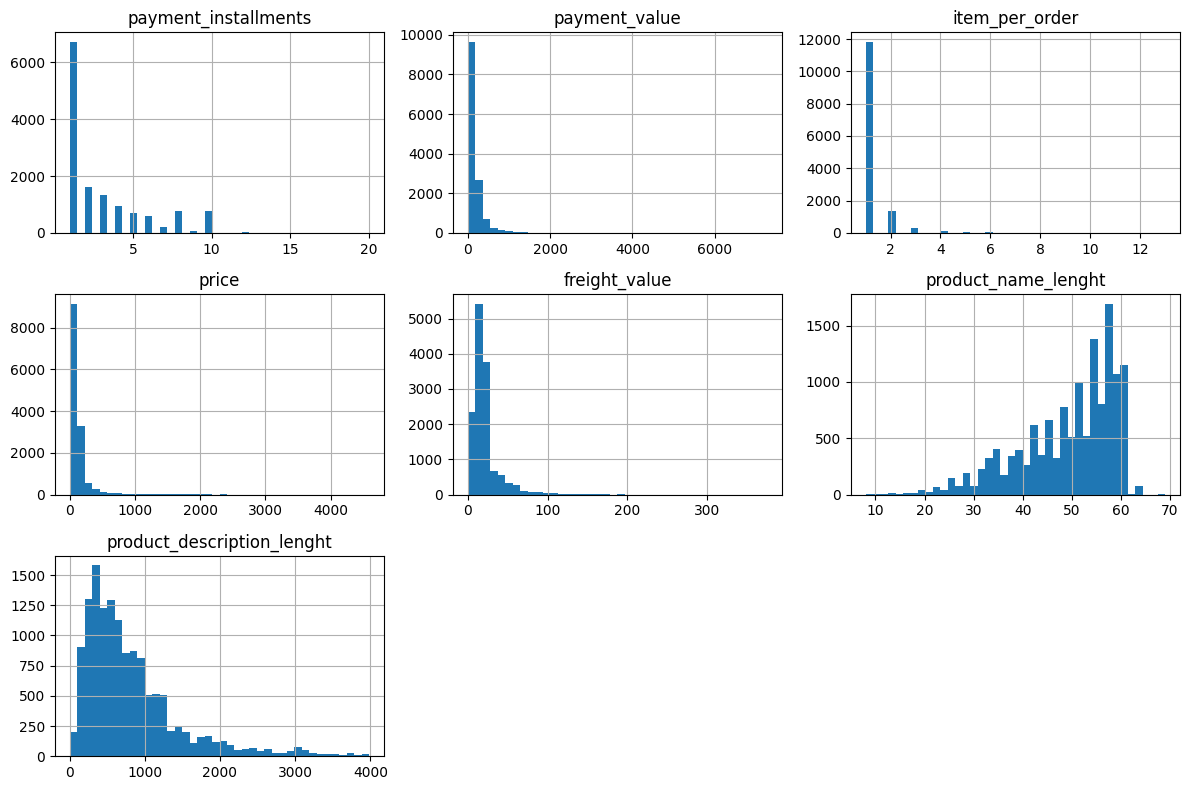

In [ ]:
from matplotlib import pyplot as plt

df.hist(figsize=(12,8), bins=40) 
plt.tight_layout()
plt.show()

**Discuss the distributions:**

* The `price`, `payment_value` and `freight_value` have a lot of values close to zero. They have a long tail.

* `payment_installment` and `item_per_order` are categorical but also here we see some imbalance.

**Do there appear to be outliers?**

There could be outliers due to the long tails of the variables but with the boxplots we will check if there are any.



---

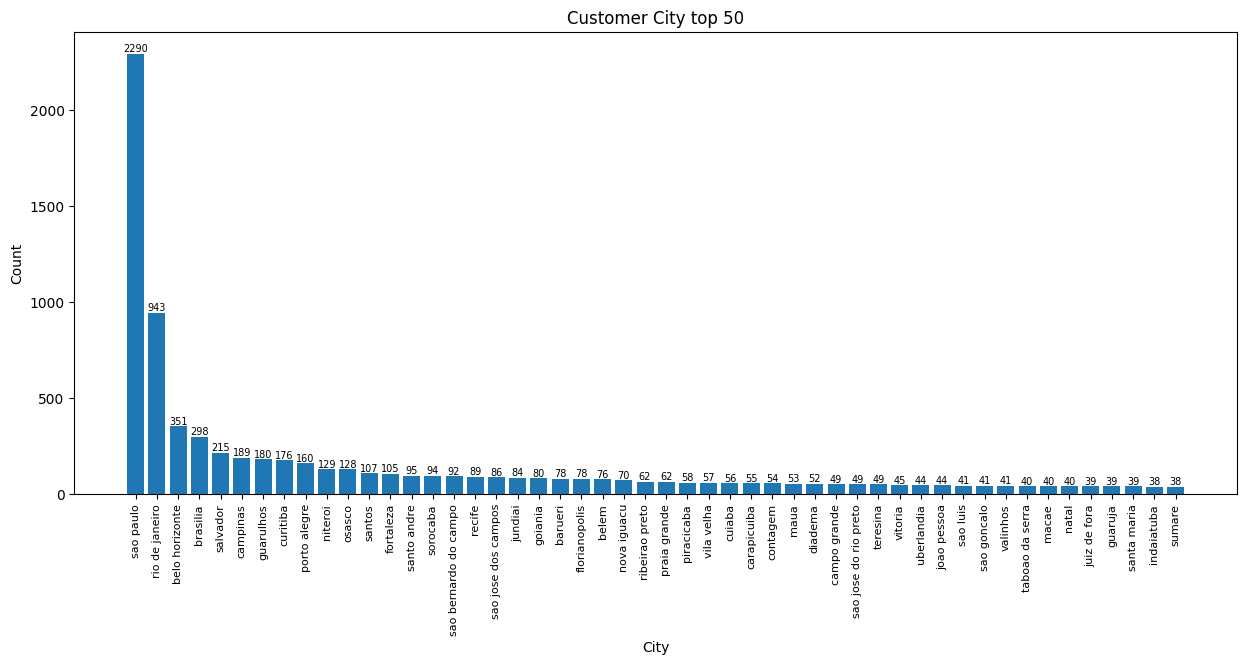

In [ ]:
# Customer City
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['customer_city'].value_counts()
plt.bar(city_counts.index[:50], city_counts.values[:50])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Customer City top 50')
for i, v in enumerate(city_counts.values[:50]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

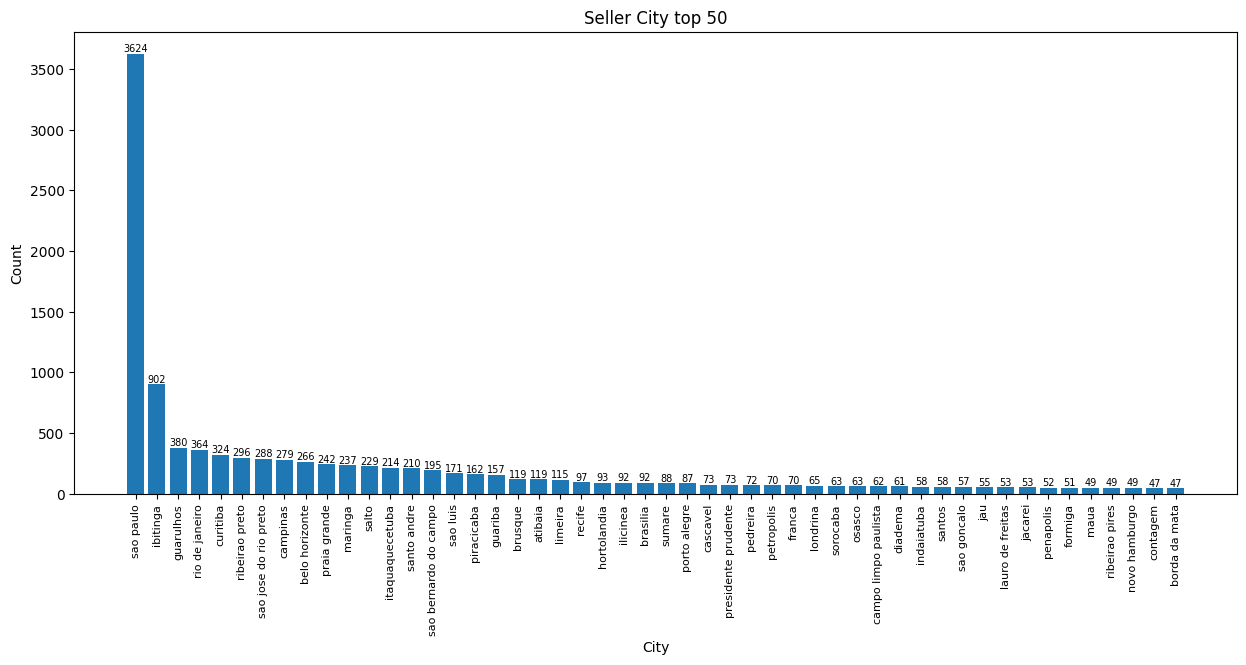

In [ ]:
# Seller City
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['seller_city'].value_counts()
plt.bar(city_counts.index[:50], city_counts.values[:50])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Seller City top 50')
for i, v in enumerate(city_counts.values[:50]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7)
plt.show()

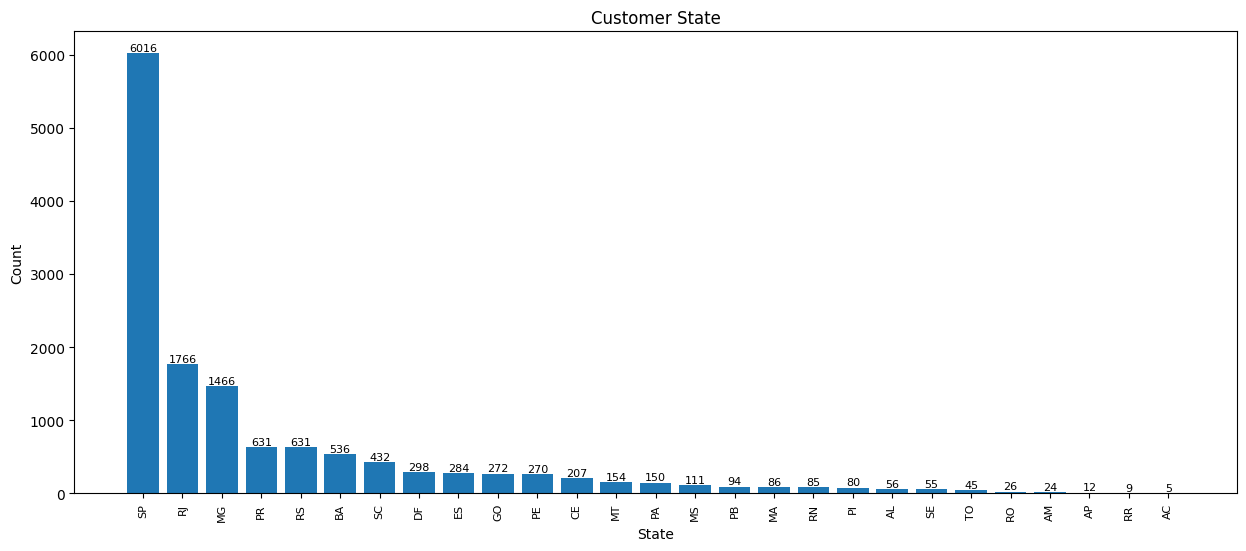

In [ ]:
# Customer State
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['customer_state'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Customer State')
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

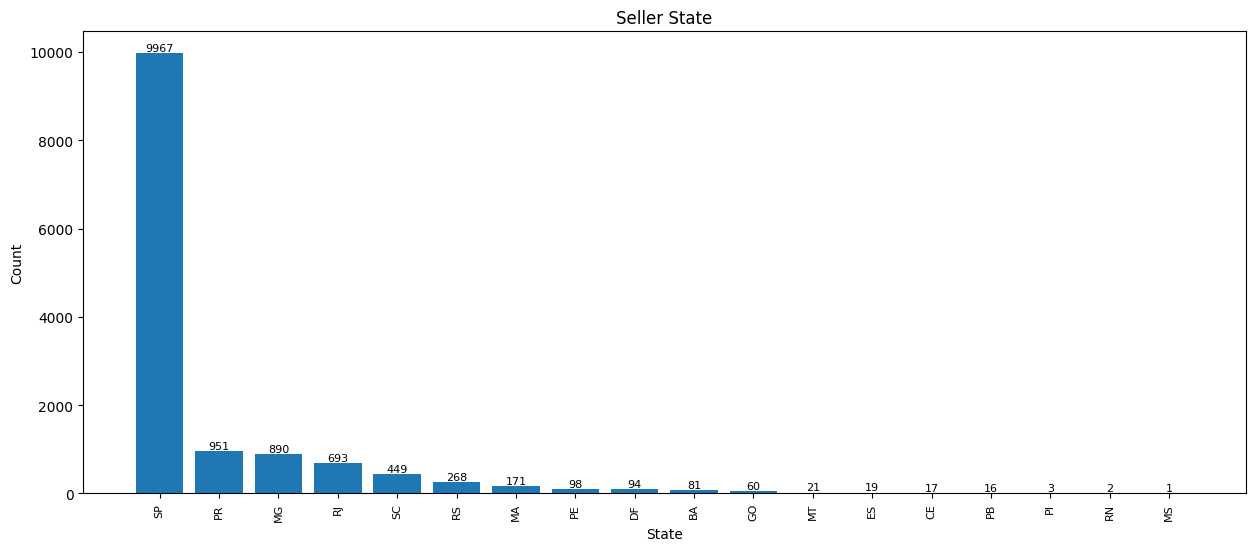

In [ ]:
# Seller State
fig, ax = plt.subplots(figsize=(15, 6))
city_counts = df['seller_state'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Seller State')
for i, v in enumerate(city_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
plt.show()

**Discuss the distributions:**

* As we expected the `Customer City` has few cities with high frequency and more cities with few orders. `San Paulo is the most frequent with 2290`. the second most frequent is Inbitinga with only 943.

* Same with the `Seller City`, where `San Paulo is the most frequent with 3624`. the second most frequent is Inbitinga with only 902.

* The same is for `Customer State and Seller State`, since they are retreved from the corresponding city.

---

In [ ]:
df.describe()

,payment_installments,payment_value,item_per_order,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


Everything looks normal with these statistics.

---

## Null Values & Duplicates

Drop the duplicates:

In [ ]:
print(f'Before: {df.duplicated().sum()}')

df.drop_duplicates(inplace=True)

print(f'After: {df.duplicated().sum()}')

Before: 83
After: 0


In [ ]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
purchase_date                    0
approved_date                    0
handled_by_logistic_date         0
delivery_date                    0
estimated_delivery_date          0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_city                    0
customer_state                   0
item_per_order                   0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_category_name_english    0
dtype: int64

## Outliers

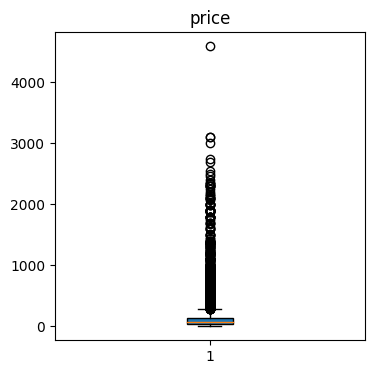

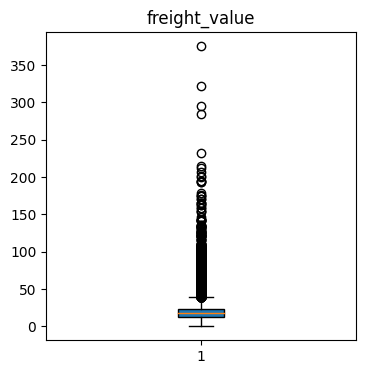

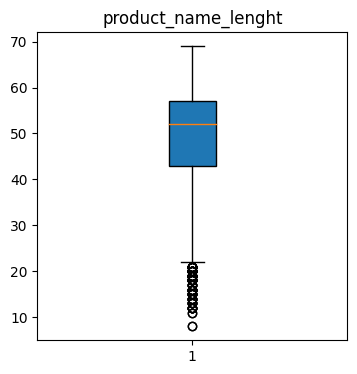

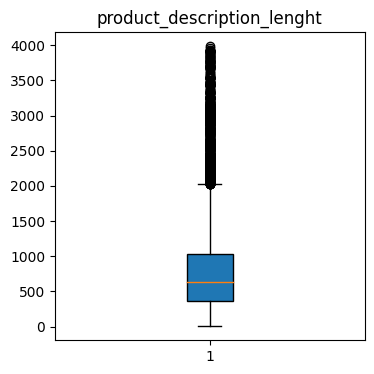

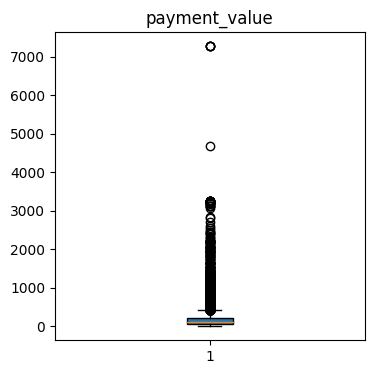

In [ ]:
import matplotlib.pyplot as plt

# Filter for only continuous variables
cont_vars = ['price', 'freight_value', 'product_name_lenght', 'product_description_lenght', 'payment_value']

for var in cont_vars:
    plt.figure(figsize=(4,4))
    plt.boxplot(df[var], vert=True, patch_artist=True)
    plt.title(var)
    plt.show()

The variables have few values that `seem outliers`. i `wouldn't consider them outliers` since its logical that `some order have an higher value` corresponding to these variables.

## Correlations/Relationships

In [ ]:
df.drop(['order_id', 'customer_id', 'order_status', 'purchase_date',
       'approved_date', 'handled_by_logistic_date', 'delivery_date',
       'estimated_delivery_date', 'payment_type', 'customer_unique_id',
       'customer_city', 'customer_state', 'product_id', 'seller_id',
       'shipping_limit_date', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english'], axis=1
        ).corr().style.background_gradient(cmap='coolwarm').format(precision=4).set_properties(**{'max-width': '100px'})

,payment_installments,payment_value,item_per_order,price,freight_value,product_name_lenght,product_description_lenght
payment_installments,1.0000,0.3081,0.0708,0.2963,0.2061,-0.0062,0.0319
payment_value,0.3081,1.0000,0.2297,0.7664,0.3834,-0.0024,0.1658
item_per_order,0.0708,0.2297,1.0000,-0.0700,-0.0501,-0.0182,-0.0281
price,0.2963,0.7664,-0.0700,1.0000,0.4147,0.0160,0.1872
freight_value,0.2061,0.3834,-0.0501,0.4147,1.0000,0.0487,0.1205
product_name_lenght,-0.0062,-0.0024,-0.0182,0.0160,0.0487,1.0000,0.1127
product_description_lenght,0.0319,0.1658,-0.0281,0.1872,0.1205,0.1127,1.0000


Which variables are most correlated? 

`price` and `payment_value` have a `correlation of 76%`.

Its logical since price is included into payment_value.

I wouldn't remove `price` since has a different meaning and also the correlation is not over 80%.

---

## Feature Engineering


### Convert the `order_status`, `payment_type` columns to a categorical.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Order Status
df['order_status'] = le.fit_transform(df['order_status'])

# payment_type
df['payment_type'] = le.fit_transform(df['payment_type'])

### Encode the `customer_city`, `customer_state`, `seller_city`, `seller_state` columns. 

To deal with the unbalanced city columns i will use the `TargetEncoder`

Target encoding is a method of feature encoding in which categorical variables are replaced with the mean target value of the corresponding category.

Features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.

In [ ]:
import pandas as pd
!pip install -q category_encoders
from category_encoders import TargetEncoder

# initialize the encoder
enc = TargetEncoder(cols=['customer_city', 'seller_city', 'seller_state', 'customer_state'])

# fit and transform the entire dataset
df = enc.fit_transform(df, df['price'])

In [ ]:
df[['customer_city', 'seller_city', 'seller_state', 'customer_state']].describe()

,customer_city,seller_city,seller_state,customer_state
count,13718.000000,13718.000000,13718.000000,13718.000000
mean,128.728102,125.026812,130.567588,130.769563
std,28.160695,59.645041,37.250779,24.093219
min,70.361299,39.242790,80.516892,113.492239
25%,110.692447,100.639205,116.608998,113.492239
50%,123.587821,100.639205,116.608998,125.812122
75%,134.600756,144.397609,129.881195,143.276540
max,400.022044,466.480203,440.492283,275.771361


### Transform the `date columns` to `datetime` and `create new columns`.

In [ ]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['approved_date'] = pd.to_datetime(df['approved_date'])
df['handled_by_logistic_date'] = pd.to_datetime(df['handled_by_logistic_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['estimated_delivery_date'] = pd.to_datetime(df['estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

# Export the Data

In [ ]:
df.head()

,order_id,customer_id,order_status,purchase_date,approved_date,handled_by_logistic_date,delivery_date,estimated_delivery_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_city,customer_state,item_per_order,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1,141.46,af07308b275d755c9edb36a90c618231,155.974000,149.392957,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,88.027414,116.608786,29,178,55
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,1,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,1,5,135.82,8b8028d453a01986b48c4271cc341475,131.450000,113.491669,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,88.034259,116.608968,29,178,55
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,1,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,0,1,128.04,3edcab192482e9871c17b34cf98c3996,76.536923,125.816993,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,88.027414,116.608786,29,178,55
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,1,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,1,2,279.30,958ac7760e5484df1496ba5833ab6117,820.847500,146.354385,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,88.034259,116.608968,29,178,55
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,1,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,1,2,279.30,958ac7760e5484df1496ba5833ab6117,820.847500,146.354385,2,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,88.034259,116.608968,29,178,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13718 entries, 0 to 13800
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       13718 non-null  object        
 1   customer_id                    13718 non-null  object        
 2   order_status                   13718 non-null  int64         
 3   purchase_date                  13718 non-null  datetime64[ns]
 4   approved_date                  13718 non-null  datetime64[ns]
 5   handled_by_logistic_date       13718 non-null  datetime64[ns]
 6   delivery_date                  13718 non-null  datetime64[ns]
 7   estimated_delivery_date        13718 non-null  datetime64[ns]
 8   payment_type                   13718 non-null  int64         
 9   payment_installments           13718 non-null  int64         
 10  payment_value                  13718 non-null  float64       
 11  customer_unique

In [ ]:
df.to_csv('/content/drive/MyDrive/University/ML/customer_segmentation_eda.csv', index=False)